## (미니 배치) 확률적 경사 하강법

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 실제값을 Y=8X+2 시뮬레이션하는 데이터 값 생성
* np.random.seed(0)
* 0과 1사이의 600개의 랜덤 값을 지정한다.
* X, y의 scatter plot으로 시각화 한다.

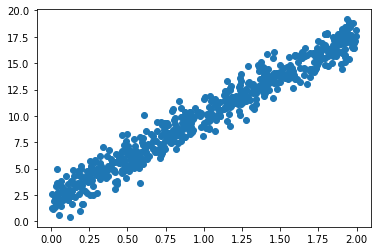

In [3]:
np.random.seed(0)
X = 2 * np.random.rand(600,1)
y = 2 +8 * X+ np.random.randn(600,1)

plt.scatter(X, y)

### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.
* def get_weight_updates(w1, w0, X, y, learning_rate=0.01):

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

### 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [5]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:7.758 w0:2.215
Gradient Descent Total Cost:0.9765


### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
* def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 7.772 w0: 2.261
Stochastic Gradient Descent Total Cost:0.9813


# 영화 관객수 예측 모델

movies_data.csv 파일이 존재합니다.

영화에 관련된 여러가지 피처들을 통해 관객수를 예측해내는 것이 목표입니다.

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

데이터셋 출처: https://dacon.io/competitions/open/235536/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [3]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#데이터셋 불러오기
movie = pd.read_csv('movies_data.csv')

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 분석에 쓸모 없을 것 같은 column을 삭제하시오.
title, distributor, release_time, director 열 삭제

In [11]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [26]:
movie.drop(['title','distributor','release_time','director'],axis=1,inplace=True)

### movie 데이터에서 결측치가 있는지 확인하고, 그 결측치를 0으로 채우시오.
dir_prev_bfnum의 변수 설명에서 관객수가 알려지지 않은 영화는 제외한다고 했으므로 단순하게 0으로 결측치 처리

In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


In [27]:
movie['dir_prev_bfnum']=movie['dir_prev_bfnum'].fillna(0)

In [18]:
#결측치가 잘 채워졌는지 확인
movie.isna().sum()

genre             0
time              0
screening_rat     0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

### 수치형 column들의 분포도를 히스토그램을 통해 시각적으로 살펴보고, 분포가 왜곡되어 있는 column이 있는지 판단하시오.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ce71a7090>,
      dtype=object)

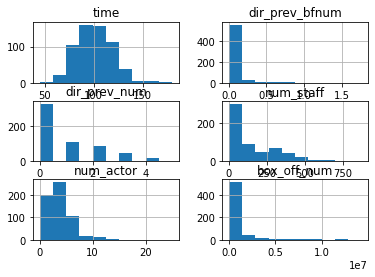

In [22]:
movie.hist()

### 위 문제에서 보았듯이, 타겟 변수인 box_off_num의 분포가 한 쪽으로 치우쳐져 있다. 타겟 변수에 대해 적절한 transformation을 적용하시오.

-> box_off_num(타겟 변수), dir_prev_bfnum, num_actor, num_staff의 분포가 왜곡되어 보임 (후에 파이프라인에서 스케일링 작업 할 것)

In [28]:
movie['box_off_num']=np.log1p(movie['box_off_num'])

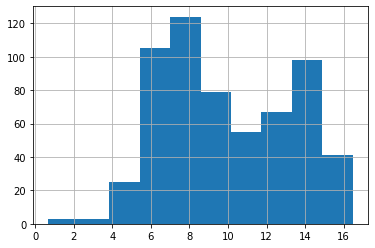

In [29]:
#잘 transfromation 되었는지 확인
movie['box_off_num'].hist()

## Linear Regression OLS로 학습/예측/평가 수행
* x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
* mse, rmse, r2_score을 출력
* 선형 회귀에 사용하는 설명 변수: ['time', 'dir_prev_bfnum', 'num_staff']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y = movie['box_off_num']
x = movie[['time', 'dir_prev_bfnum', 'num_staff']]

X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size=0.2)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 4.823 , RMSE : 2.196
Variance score : 0.568


### * 위에서 구한 모델의 절편과 회귀계수를 출력
* 회귀 계수는 round 하지 않고 그대로 출력한다.

In [35]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',lr.coef_)

절편 값: 4.252014522922606
회귀 계수값: [3.83351720e-02 2.05339561e-07 1.16570778e-02]


### * cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구한다.

In [38]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-4.12 -4.71 -4.66 -5.17 -4.58]
 5 folds 의 개별 RMSE scores :  [2.03 2.17 2.16 2.27 2.14]
 5 folds 의 평균 RMSE : 2.155 


### numerical과 categorical로 구분하여 저장한 후, 수치형 변수와 범주형 변수를 확인한다.

In [84]:
movie = pd.read_csv('movies_data.csv')
movie.drop(['title','distributor','release_time','director'],axis=1,inplace=True)
categorical=movie[['genre','screening_rat']]
numerical=movie[['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor','box_off_num']]
movie['dir_prev_bfnum']=movie['dir_prev_bfnum'].fillna(0)
movie['box_off_num']=np.log1p(movie['box_off_num'])

### 위에서 지정한 numerical 변수 간의 상관관계를 heatmap을 통해 표현한다.

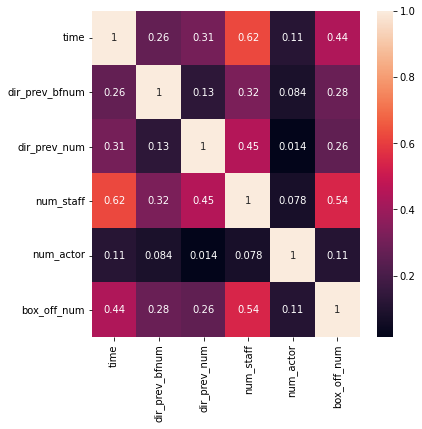

In [41]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(numerical.corr(), annot=True)

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_movie, y_movie으로 저장하시오. (target은 box_off_num)

In [85]:
X_movie=movie.drop(['box_off_num'],axis=1,inplace=False)
y_movie=movie['box_off_num']

In [86]:
#데이터 확인 (X_movie)
X_movie

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,96,청소년 관람불가,0.00,0,91,2
1,느와르,130,청소년 관람불가,1161602.50,2,387,3
2,액션,123,15세 관람가,220775.25,4,343,4
3,코미디,101,전체 관람가,23894.00,2,20,6
4,코미디,108,15세 관람가,1.00,1,251,2
...,...,...,...,...,...,...,...
595,드라마,111,청소년 관람불가,3833.00,1,510,7
596,드라마,127,15세 관람가,496061.00,1,286,6
597,공포,99,청소년 관람불가,0.00,0,123,4
598,느와르,102,15세 관람가,0.00,0,431,4


In [87]:
#데이터 확인(y_movie)
y_movie

0      10.060449
1      15.771725
2      15.755558
3      12.291640
4      13.088575
         ...    
595    14.204231
596    14.355762
597     7.814400
598    14.600565
599    15.784933
Name: box_off_num, Length: 600, dtype: float64

### 피쳐값 중 카테고리 변수가 2가지 있다. 2개의 카테고리 변수가 어떤 값을 갖고 있는지 파악하시오. 이에 대해 Encoding을 진행하고 각각 어떻게 Encoding 되었는지 설명하시오. (LabelEncoder 사용)
ex) 드라마 4, 청불 3, ...

In [88]:
from sklearn import preprocessing

X_movie['genre'].value_counts()
X_movie['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [89]:
#genre, screening_rat 피쳐에 대해 Encoding 진행
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['genre','screening_rat']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    
    return dataDF

x_movie=encode_features(X_movie)


In [90]:
#Encoding이 잘 되었는지 확인
X_movie.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,10,96,3,0.00,0,91,2
1,2,130,3,1161602.50,2,387,3
2,10,123,1,220775.25,4,343,4
3,11,101,2,23894.00,2,20,6
4,11,108,1,1.00,1,251,2


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [91]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_movie, y_movie ,test_size=0.2,random_state=123)

In [37]:
#잘 분리되었는지 확인


## 선형 규제 모델 사용해보기

### 릿지
- 릿지 회귀를 적용하여 5개 폴드의 개별 RMSE와 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, alpha=10

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_movie, y_movie, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-4.496 -4.652 -4.298 -4.769 -4.386]
 5 folds 의 개별 RMSE scores :  [2.12  2.157 2.073 2.184 2.094]
 5 folds 의 평균 RMSE : 2.126 


- 알파 값을 변화시켜가며 릿지를 수행하시오.
- alphas = [0 , 0.1 , 1 , 10 , 100]

In [93]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_movie, y_movie, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 10 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 100 일 때 5 folds 의 평균 RMSE : 2.124 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

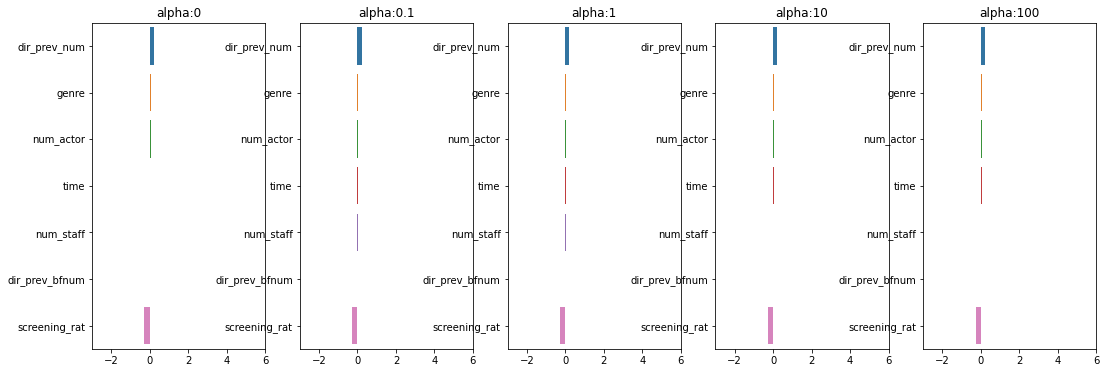

In [95]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

coeff_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_movie , y_movie)  
    coeff = pd.Series(data=ridge.coef_ , index=X_movie.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()


- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오.

In [96]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
dir_prev_num,2.160634e-01,2.160306e-01,2.157357e-01,2.128311e-01,1.875993e-01
genre,4.951502e-02,4.951441e-02,4.950886e-02,4.945307e-02,4.887130e-02
num_actor,4.634393e-02,4.634272e-02,4.633189e-02,4.622398e-02,4.518251e-02
time,3.825985e-02,3.825998e-02,3.826112e-02,3.827236e-02,3.836886e-02
num_staff,1.120740e-02,1.120752e-02,1.120860e-02,1.121924e-02,1.131268e-02
dir_prev_bfnum,-3.245587e-08,-3.244754e-08,-3.237272e-08,-3.163539e-08,-2.520886e-08
screening_rat,-2.772074e-01,-2.771708e-01,-2.768418e-01,-2.735943e-01,-2.448568e-01


### 라쏘
- get_linear_reg_eval 함수에 라쏘 회귀를 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [97]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [98]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_movie, y_target_n=y_movie)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.130 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.133 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.155 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.156 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.165 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

In [100]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,1.509030e-01,1.229741e-01,0.000000e+00,0.000000e+00,0.000000e+00
genre,4.226141e-02,3.915271e-02,0.000000e+00,0.000000e+00,0.000000e+00
time,3.832280e-02,3.834957e-02,3.756934e-02,3.522953e-02,2.587071e-02
num_actor,3.540965e-02,3.072360e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_staff,1.145277e-02,1.155794e-02,1.224377e-02,1.237803e-02,1.291503e-02
dir_prev_bfnum,-1.489141e-08,-7.362938e-09,3.128091e-08,3.360602e-08,4.290977e-08
screening_rat,-2.235372e-01,-2.005355e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00


### 엘라스틱 넷
- get_linear_reg_eval 함수에 엘라스틱 넷을 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [101]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_movie, y_target_n=y_movie)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.128 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.130 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.154 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.155 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.160 


- 알파 값에 따르 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

In [102]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,1.672710e-01,1.469289e-01,0.000000e+00,0.000000e+00,0.000000e+00
genre,4.436394e-02,4.215894e-02,1.198564e-02,0.000000e+00,0.000000e+00
num_actor,3.856986e-02,3.525728e-02,0.000000e+00,0.000000e+00,0.000000e+00
time,3.831609e-02,3.833792e-02,3.824603e-02,3.657964e-02,2.995074e-02
num_staff,1.139130e-02,1.146833e-02,1.218106e-02,1.230089e-02,1.268163e-02
dir_prev_bfnum,-1.934772e-08,-1.387069e-08,2.911256e-08,3.224897e-08,3.881969e-08
screening_rat,-2.356984e-01,-2.183114e-01,-2.294758e-03,-0.000000e+00,-0.000000e+00


## 회귀 트리와 스태킹 앙상블
### 개별 회귀 트리 모델과 스태킹 회귀 모델의 성능을 비교하시오.
- 개별 회귀 트리 모델: DecisionTreeRegressor(random_state=123)
- 스태킹 앙상블에서의 base model : Ridge(alpha=8), Lasso(alpha=0.001), XGBRegressor(n_estimators=1000, learning_rate=0.05), LGBMRegressor(n_estimators=1000, learning_rate=0.05)
- 스태킹 앙상블에서의 최종 메타 model : Ridge(alpha=0.1)
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


rf = RandomForestRegressor(random_state=123, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_movie, y_movie, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))




 5 교차 검증의 개별 Negative MSE scores:  [-3.84 -3.83 -4.12 -3.76 -3.96]
 5 교차 검증의 개별 RMSE scores :  [1.96 1.96 2.03 1.94 1.99]
 5 교차 검증의 평균 RMSE : 1.975 


In [104]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_movie, y_movie, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

## 선형 회귀 모델과 파이프라인(Pipeline) 설계
전처리 문제 3번에서 보았듯이, 특정 변수들의 분포도가 치우쳐져 있다. 이를 위해 전처리를 하고 GridSearchCV를 하기 위해선 Pipeline을 설계해야 한다.

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하고, 테스트 세트에 대한 R2 score를 도출하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7, random_state=123

### 파이프라인은 전처리 단계와 함께 GridSearchCV를 할 때 유용하게 사용된다. 앞서 만든 pipe를 토대로 GridSearchCV를 수행하고, 최적의 하이퍼 파라미터와 RMSE를 도출하시오.
- alpha : [0.1, 0.01, 0.05, 0.07]
- l1_ratio : [0, 0.5, 0.7, 0.8, 1]
- max_iter : [10,50,70,100,1000,2000]
- cv = 5, n_jobs=-1